# Машинное обучение

В общем случае, задачу машинного обучения можно сформулировать так:

Есть некоторый набор данных. Есть некоторый алгоритм (будем называть его моделью), который для каждой точки из набора данных выдает некоторое предсказание. Есть функция, которая измеряет качество предсказаний -- ее называют функцией потерь (Loss function, например, MSE).

Цель -- подобрать такую модель, которая минимизирует функцию потерь, то есть, делает наиболее точное редсказание.

Как именно подбирается эта модель, зависит от конкретного случая, но общая картина примерно такая: выбирается некоторый класс моделей, которые отличаются друг от друга значениями внутренних параметров. В качестве примера здесь можно представить себе интерполяционный многочлен. Класс моделей -- все многочлены степени d, внутренние параметры -- коэффициенты многочлена.


__Вопрос:__ Вспомним задачу приближения кривой с помощью многочлена со второго семинара. Что является набором данных и прогнозируемой величиной в данной задаче?



Обычно функция потерь выбирается так, чтобы можно было сказать, как она меняется при небольшом изменении параметров модели (математики говорят, что "функция потерь дифференцируема по параметрам модели"). В этом случае мы всегда можем понять, в какую сторону надо менять каждый параметр, чуть-чуть сдвинуть их все и повторять эту процедуру, пока значение функции потерь не перестанет меняться. Этот процесс называется градиентным спуском.

## Обучение с учителем (supervised learning)

Типы задач обучения с учителем:

1. __Регрессия__: предсказываем числовое значение.

3. __Ранжирование__
2. __Классификация__: каждый объект относится к камому-то (заранее известному!) классу, который мы предсказываем. Отдельные подвиды: 


- бинарная классификация (делим все объекты на два класса)
- многоклассовая классификация (класов больше 2)
- многоклассовая классификация с пересекающимися классами (multi-label classification, каждый объект может относится к нескольким классам)

## Обучение без учителя (unsupervised learning)

В задачах обучения без учители истинные метки объектов неизвестны, и задача состоит в том, чтобы основываясь на признаковом описании объектов установить некоторые закономерности и общие черты у объектов.

Типы задач обучения без учителя:

1. __Кластеризация__: разделение объектов на группы (кластеры) так, чтобы у объектов в одной группе были схожие признаки, а у объектов разных групп - разные. 
2. __Визуализация__: изображение объектов многомерного признакового пространства в двух- или трехмерном пространстве для наглядности.
3. __Понижение размерности__: преобразование n-мерного пространства признаков в m-мерное (m < n).


__ Задание:__ сформулируйте следующие задачи как задачи машинного обучения: укажите тип решаемой задачи, объекты, возможные признаки и что нужно предсказать.

- прогнозирование цены квартиры
- распознавание рукописного текста
- сегментация изображений
- определение тональности или жанра текста
- прогноз погоды
- фильтрация спама

В этом блокноте мы будем рассматривать только задачи обучения с учителем, то есть задачи, в которых для каждого объекта в обучающей выборке есть в том или ином виде "правильная" метка, и задача модели -- восстановить аналогичные метки для новых объектов. 

## Регрессия

С задачей регрессии вы уже встречались на прошлом занятии.

Ее можно сформулировать так: есть набор объектов, для каждого из них задано значение функции f(x). Мы хотим научиться предсказывать это значение для объектов с помощью нашей модели $P(x)$.

В качестве функции потерь как правило используется MSE -- mean square error, среднеквадратичная ошибка. Мы с ней уже встречались:
$$ MSE(P(x)) = \frac{1}{n} \sum \left(f(x_i) - P(x_i)\right)^2 $$

В задачах машинного обучения каждый объект обычно описывается большим количеством признаков (features): $x_1, x_2, \ldots, x_n$.

Простейшая модель, решающая задачу регрессии -- линейная регрессия: мы пытаемся подобрать линейную комбинацию признаков, которая будет предсказывать значение для каждого объекта. А именно функцию P(x) мы подбираем в конкретном виде

$$P(x_1, x_2, \ldots, x_n) = a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$$

Есть очень популярный датасет, на котором рассматривают задачу регрессии: Boston housing prices, цены на жилье в разных районах Бостона. Про каждый район известны разные демографические данные и медианная цена жилья в нем. Мы пытаемся научиться предсказывать цену исходя из этих данных. 

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('boston_data.csv') # считываем датасет в формате csv с помощью библиотеки Pandas
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


In [4]:
data.shape

(404, 14)

In [5]:
from IPython.display import Image
from IPython.core.display import HTML

# описание признаков в датасете

Image(url= "https://cdn-images-1.medium.com/max/1600/1*i9vZk7NkS1dZz6JEcbV5nA.png")

### Рассмотрим наши данные поближе:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rm = np.array(data['rm']) # cреднее число комнат
pr = np.array(data['medv']) # cредняя цена

### Зависимость цены от количества квартир:

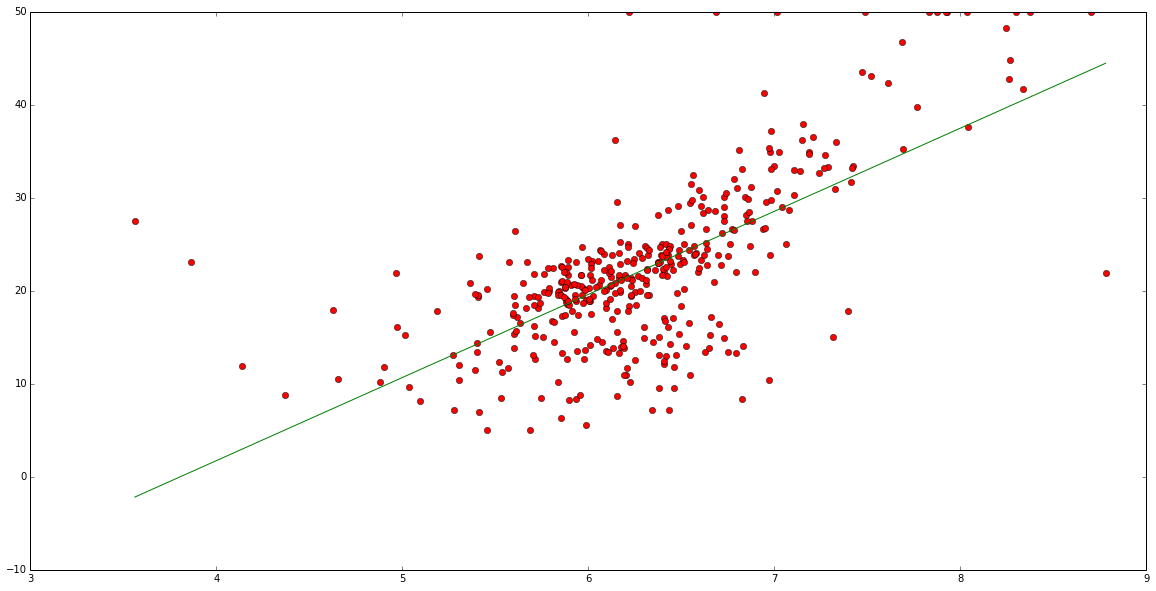

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(rm, pr, 'o', c='red')
plt.plot(np.unique(rm), np.poly1d(np.polyfit(rm, pr, 1))(np.unique(rm)))
plt.show()

### Зависимость цены от процента малообеспеченого населения в районе:

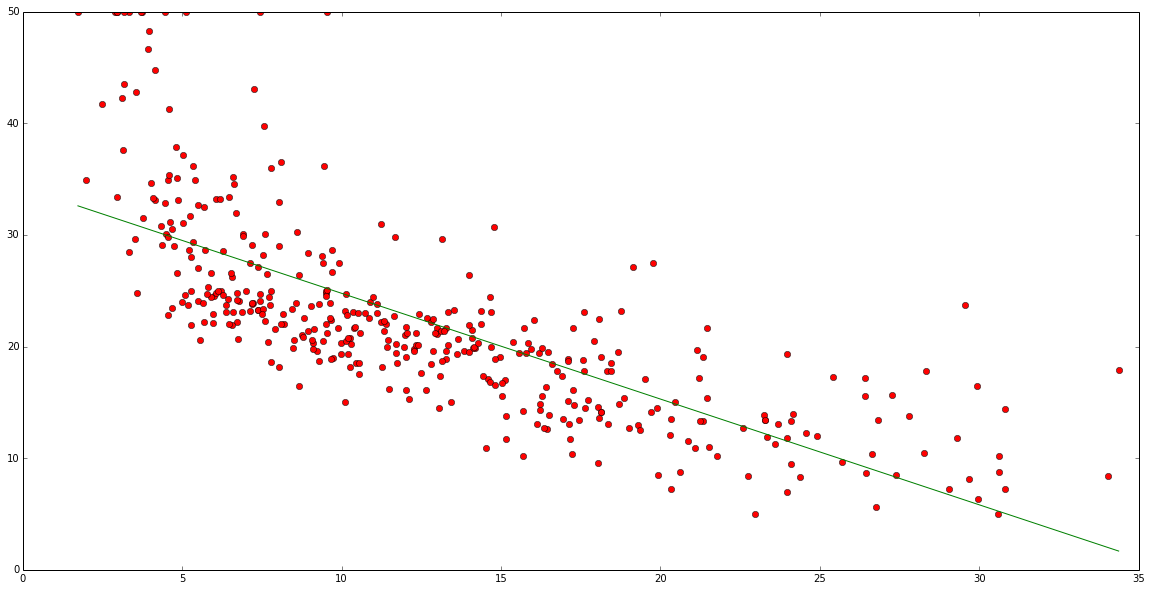

In [13]:
lstat = np.array(data['lstat'])
plt.figure(figsize=(20, 10))
plt.plot(lstat, pr, 'o', c='red')
plt.plot(np.unique(lstat), np.poly1d(np.polyfit(lstat, pr, 1))(np.unique(lstat)))
plt.show()

### Зависимость цены от концентрации нитратов в воздухе:

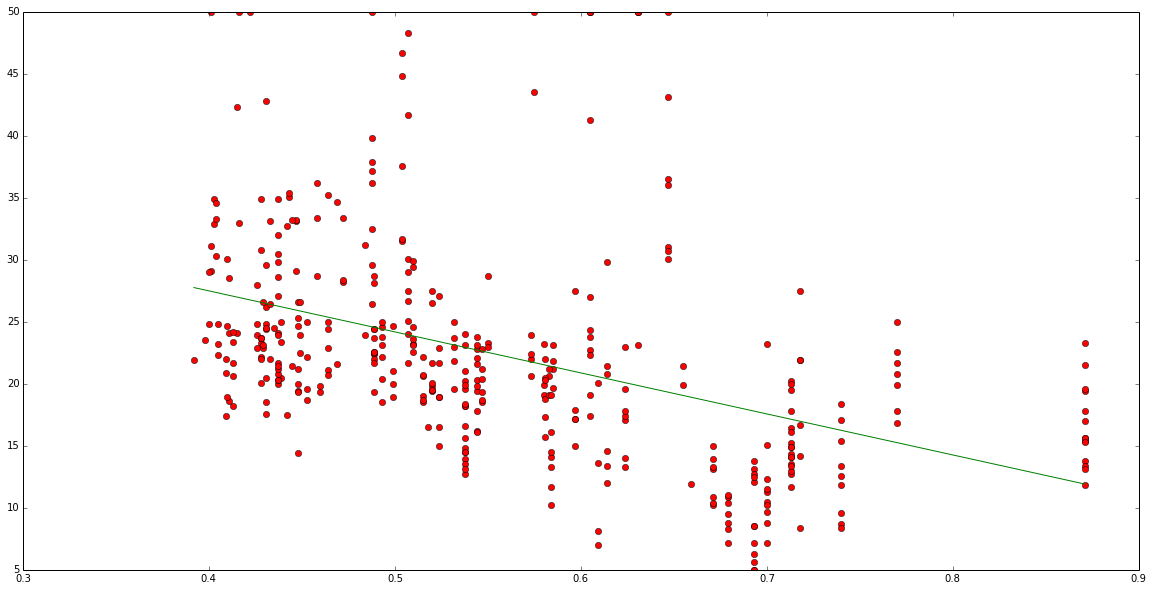

In [14]:
nox = np.array(data['nox'])
plt.figure(figsize=(20, 10))
plt.plot(nox, pr, 'o', c='red')
plt.plot(np.unique(nox), np.poly1d(np.polyfit(nox, pr, 1))(np.unique(nox)))
plt.show()

Посмотрим на основные характеристики всех признаков: среднее, максимум и минимум, среднее отклонение и т.д.

Убираем целевую переменную из датасета:

In [16]:
X = data.drop(columns=['medv'])

X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


Разбиваем наши данные на обучающую и тестовую части в пропорции 2 к 1:

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, pr, test_size=0.33, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 13)
(134, 13)
(270,)
(134,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse



# линейная регрессия 
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# вычисляем MSE
mse(y_test, y_pred) 

19.55680552046687

Это плохой или хороший результат?

Посмотрим на среднюю абсолютную ошибку:

$$ MAE(P(x)) =  \frac{1}{n} \sum \left|(f(x_i) - P(x_i)|\right) $$

In [19]:
from sklearn.metrics import mean_absolute_error as mae


mae(y_test, y_pred) 

3.2165211959361621

In [20]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


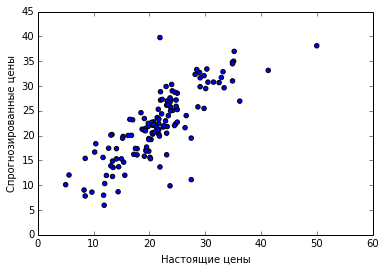

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel(u"Настоящие цены")
plt.ylabel(u"Спрогнозированные цены")

plt.show()

Посмотрим на коэффициенты регрессии, соответствующие признакам:

In [23]:
z = zip(data.columns, regr.coef_)
sorted(z, key = lambda x: abs(x[1]), reverse=True)

[('nox', -13.354531300897543),
 ('rm', 4.7419542688149319),
 ('chas', 3.2291253868533882),
 ('dis', -1.1393372226082605),
 ('ptratio', -0.90050318895750581),
 ('lstat', -0.51881987227513982),
 ('rad', 0.24733022635437871),
 ('crim', -0.059150970428138945),
 ('zn', 0.041185111511063202),
 ('tax', -0.011053725240408666),
 ('black', 0.010759128013805352),
 ('age', 0.0021826643297901474),
 ('indus', 0.0010576729848299719)]

Похоже, что параметр chas, ранее нами не рассмотренный, тоже сильно влияет на целевую переменную.

In [24]:
means = data.groupby('chas')['medv'].mean()
print(means)

chas
0.0    21.971809
1.0    26.885714
Name: medv, dtype: float64


Можем также посмотреть, как каждый из признаков минимизирует MSE: последовательно исключим каждый признак из датасета и обучимся без него.

In [26]:
errors = {}

for feature in X_test:
    reg = LinearRegression()
    reg.fit(X_test.loc[:, X_test.columns != feature], y_test)
    errors[feature] = [mse(y_train, reg.predict(X_train.loc[:, X_train.columns != feature])),mae(y_train, reg.predict(X_train.loc[:, X_train.columns != feature]))]
    
errors = sorted(errors.items(), key=lambda x: x[1], reverse=True)

print()'Признак\t\t MSE', '\t\t MAE \n')


for e in errors:
    print(e[0][:6], "\t\t", '%.3f' % e[1][0], "\t",'%.3f' % e[1][1])

Признак		 MSE 		 MAE 

rm 		33.139 	3.818
ptrati 		31.911 	3.960
lstat 		31.682 	3.789
dis 		30.525 	3.775
rad 		29.283 	3.703
tax 		28.437 	3.599
crim 		28.096 	3.585
black 		28.076 	3.645
nox 		27.513 	3.527
zn 		27.428 	3.581
age 		27.362 	3.578
chas 		27.238 	3.547
indus 		26.472 	3.454


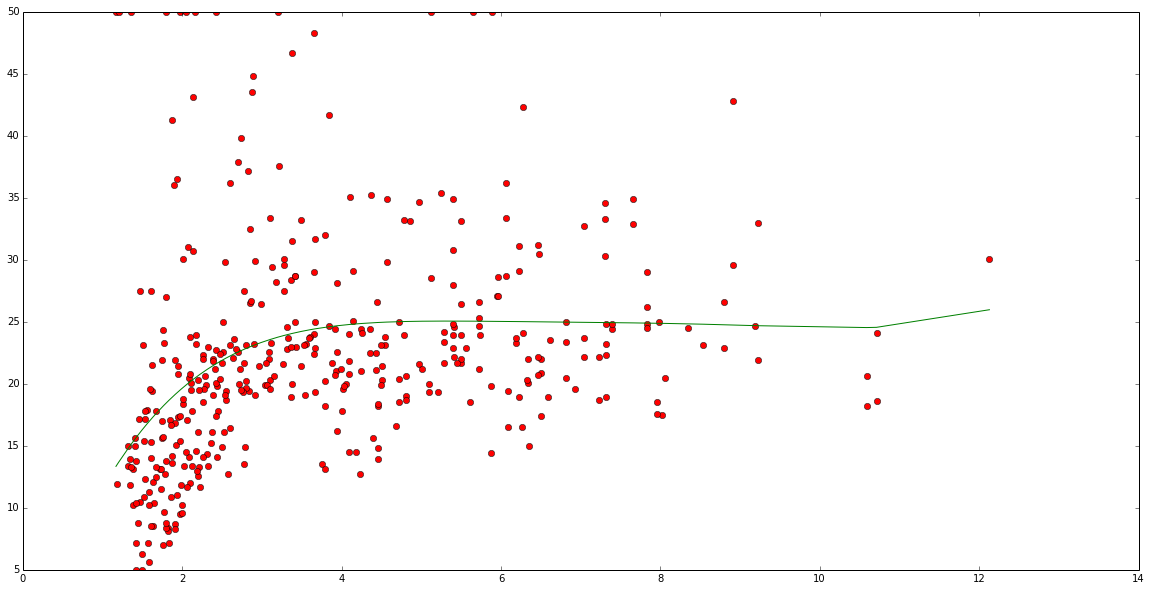

In [27]:
dis = np.array(data['dis'])
plt.figure(figsize=(20, 10))
plt.plot(dis, pr, 'o', c='red')
plt.plot(np.unique(dis), np.poly1d(np.polyfit(dis, pr, 5))(np.unique(dis)))
plt.show()

Добавляем регуляризацию: для этого будем использовать Ридж-регрессию.

In [28]:
X.shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 13)
(134, 13)
(270,)
(134,)


In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as mae


X_train, X_test, y_train, y_test = train_test_split(X, pr, test_size=0.33, random_state=42) 


alphas = [0.0001,0.001,0.01,0.1,1, 10, 100]
print('alpha\t\t MSE \t\t MAE')
print()
for a in alphas:
    ridgereg = Ridge(alpha=a, normalize=True)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_test)
    print(a, '\t\t', '%.3f' % mse(y_test, y_pred),  '\t', '%.3f' % mae(y_test, y_pred))

alpha		 MSE 		 MAE

0.0001 		19.558 	3.216
0.001 		19.564 	3.216
0.01 		19.627 	3.216
0.1 		19.841 	3.233
1 		20.104 	3.399
10 		33.589 	4.396
100 		49.351 	5.251


### Преобразование исходных признаков.

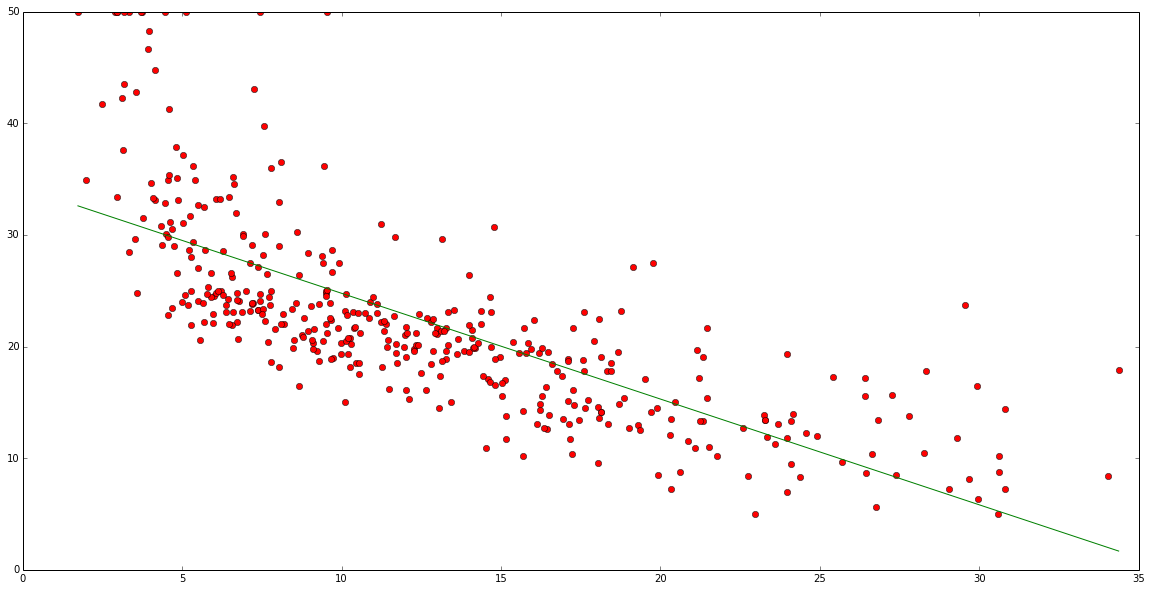

In [31]:
lstat = np.array(data['lstat'])
plt.figure(figsize=(20, 10))
plt.plot(lstat, pr, 'o', c='red')
plt.plot(np.unique(lstat), np.poly1d(np.polyfit(lstat, pr, 1))(np.unique(lstat)))
plt.show()

Попробуем преобразовать исходные данные так, чтобы зависимость между признаком lstat и целевой переменной стала больше похожа на линейную:

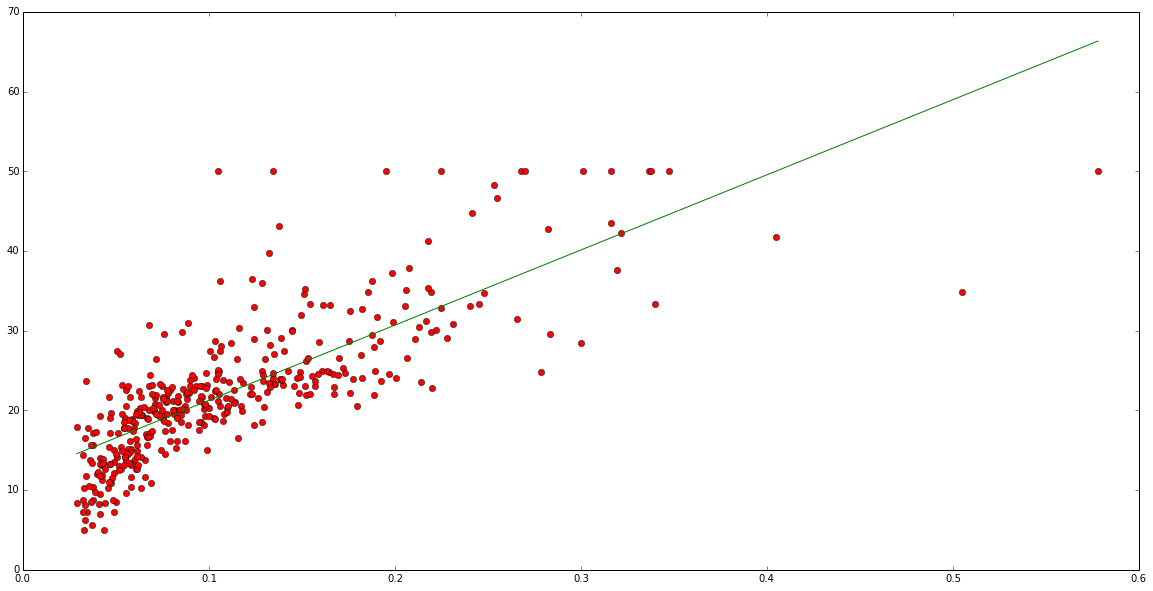

In [32]:
lstat = 1 / np.array(data['lstat']) 
plt.figure(figsize=(20, 10))
plt.plot(lstat, pr, 'o', c='red')
plt.plot(np.unique(lstat), np.poly1d(np.polyfit(lstat, pr, 1))(np.unique(lstat)))
plt.show()

Уже лучше!

Придумайте аналогичные преобразования этого и других признаков.

## Kaggle

In [33]:
test = pd.read_csv('boston_test_data.csv')

test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
1,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [34]:
preds = regr.predict(test)
preds[:4]

array([ 34.5591317 ,  21.2786761 ,   8.61212232,  23.93512021])

In [35]:
dt = pd.DataFrame({'id': np.arange(102), 'price': preds})

dt.head()

,id,price
0,0,34.559132
1,1,21.278676
2,2,8.612122
3,3,23.935120
4,4,18.039932


In [36]:
dt.to_csv('preds.csv',  index=False) 